In [54]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

Done!


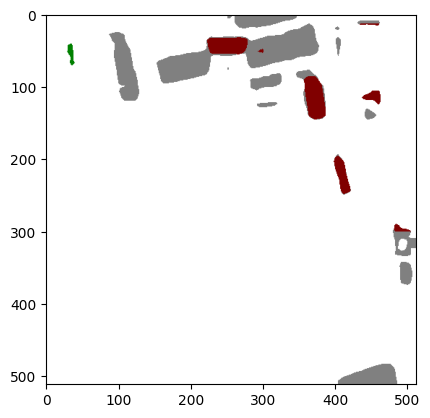

In [24]:
# 간단한 연산으로 semantic segmentation map + binary change map -> semantic change map 생성  
def image_pixel_sum(image1_path, image2_path, output_path):
    
    # read a image file
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)
    im2_neg = image2.copy()
    im2_neg = 255 - im2_neg

    # image read 
    if image1.shape != image2.shape:
        raise ValueError("Shape of each images must be same.")

    # get pixel sum and BGR to RGB 
    sum_image = cv2.add(image1, im2_neg)
    sum_image = cv2.cvtColor(sum_image, cv2.COLOR_BGR2RGB)

    # save image 
    cv2.imwrite(output_path, sum_image)
    plt.imshow(sum_image)

if __name__ == "__main__":
    
    image1_path = "test/07758_rgb_1.png"  # first image (Semantic Segmentation Map)
    image2_path = "test/07758_change.png"  # second image (Binary Change Map)
    output_path = "test/result.png"  # result (Semantic Change Map)

    try:
        image_pixel_sum(image1_path, image2_path, output_path)
        print("Done!")
    except Exception as e:
        print(f"Error: {e}")

In [25]:
image1_path = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/label/00003.png"  # first image (Semantic Segmentation Map)
image1 = cv2.imread(image1_path)
image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.imread("/home/dh.choi/ddpmcd/ddpm-cd/dataset/Binary/LEVIR-CD256/label/test_1_4.png")
print(image.shape)
print(np.unique(image2))
print(image2.shape) # binary map이어도 3텐서임. 


(512, 512)
[  0 255]
(256, 256, 3)


In [33]:
# DDPM-cd train을 위해 데이터셋 분할, txt파일 생성
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import random
def makedatatxt(input_folder):
    # 입력 폴더 내의 파일 목록을 얻습니다.
    img_list = os.listdir(input_folder)
    datatxt = []
    # 파일 목록을 순회하며 이미지를 binary로 처리합니다.
    for file_name in img_list:
        datatxt.append(file_name)
        
    random.shuffle(datatxt)
        
    train_segment = int(len(datatxt) * 0.7)
    val_segment = int(len(datatxt) * 0.1) 

    train_list = datatxt[:train_segment]
    val_list = datatxt[train_segment:train_segment+val_segment]
    test_list = datatxt[train_segment+val_segment:]
    
    with open("/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/list/train.txt", 'w') as file:
        for name in train_list:
            file.write(name + "\n")
            
    with open("/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/list/val.txt", 'w') as file:
        for name in val_list:
            file.write(name + "\n")
            
    with open("/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/list/test.txt", 'w') as file:
        for name in test_list:
            file.write(name + "\n")
            
# 입력 폴더와 출력 폴더를 설정합니다.
input_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/A"

makedatatxt(input_folder)

[0. 1. 2. 3. 5.]


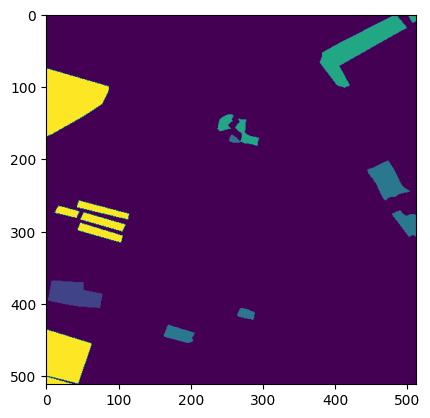

In [53]:
# CNAN-CD, tif 불러와서 확인

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 테스트를 위해 파일 경로를 지정합니다.
file_1 = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/CNAM-CD(V1)/A/4.tif'
file_2 = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/CNAM-CD(V1)/B/4.tif'
file_label = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/CNAM-CD(V1)/label/2500.tif'

# TIF 파일을 OpenCV로 읽어옵니다.
image1 = cv2.imread(file_1, cv2.IMREAD_UNCHANGED)
image2 = cv2.imread(file_2, cv2.IMREAD_UNCHANGED)
label = cv2.imread(file_label, cv2.IMREAD_UNCHANGED)
print(np.unique(label))
if image is None:
    raise FileNotFoundError("Unable to read the TIF file.")
plt.imshow(label)


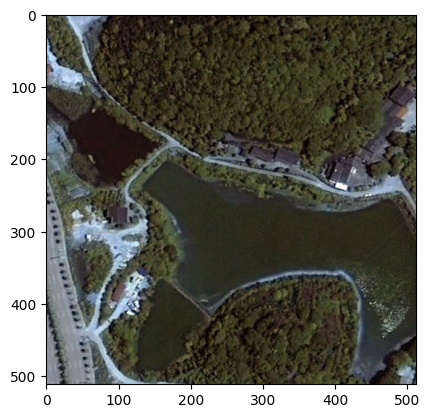

In [45]:
plt.imshow(image2)

In [ ]:
# semantic change map -> binary change map 

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

def rgbtogray(input_folder, output_folder):
    # 입력 폴더 내의 파일 목록을 얻습니다.
    img_list = os.listdir(input_folder)
    
    # 파일 목록을 순회하며 이미지를 binary로 처리합니다.
    for file_name in img_list:
        input_path = os.path.join(input_folder, file_name)
        colorimg = cv2.imread(input_path)
        gray = cv2.cvtColor(colorimg, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        ret, bin = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)
        bin = 255 - bin # negate
        plt.imshow(bin)
        output_image = np.zeros((256, 256, 3), dtype = np.uint8)
        output_image[:, :, 0] = bin
        output_image[:, :, 1] = bin
        output_image[:, :, 2] = bin
        plt.imshow(output_image)
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, output_image)
          
    print("Done!")
            
# 입력 폴더와 출력 폴더를 설정합니다.
input_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/temp"
output_folder =  "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/label"

rgbtogray(input_folder, output_folder)

In [63]:
# 512 -> 256 crop

import os
import cv2

def crop_images(img_1_folder, img_2_folder, mask_1_folder, mask_2_folder, output_img_1_folder, output_img_2_folder, 
            output_mask_1_folder, output_mask_2_folder):
    # 입력 폴더 내의 파일 목록을 얻습니다.
    img_list = os.listdir(img_1_folder)
    img_list = os.listdir(img_2_folder)
    mask_list = os.listdir(mask_1_folder)
    
    # 파일 목록을 순회하며 이미지를 crop합니다.
    for file_name in img_list:
        img_1_path = os.path.join(img_1_folder, file_name)
        img_2_path = os.path.join(img_2_folder, file_name)
        mask_1_path = os.path.join(mask_1_folder, file_name)
        mask_2_path = os.path.join(mask_2_folder, file_name)
        
        # image import 
        img_1 = cv2.imread(img_1_path)
        img_2 = cv2.imread(img_2_path)
        mask_1 = cv2.imread(mask_1_path)
        mask_2 = cv2.imread(mask_2_path)

        # 이미지가 존재하지 않는 경우 스킵
        if img_1 is None:
            print(f"Skipping {file_name} as it could not be read.")
            continue
        
        if img_2 is None:
            print(f"Skipping {file_name} as it could not be read.")
            continue

        # 이미지를 256x256 크기로 crop
        height, width = img_1.shape[:2]
        if height < 512 or width < 512:
            print(f"Skipping {file_name} as it is too small to crop (size: {width}x{height}).")
            continue
        
        height, width = img_2.shape[:2]
        if height < 512 or width < 512:
            print(f"Skipping {file_name} as it is too small to crop (size: {width}x{height}).")
            continue
        
        # Left up 
        
        file_name = file_name[:-4]
        # print(file_name)

        crop_x = 0
        crop_y = 0
        cropped_img_1 = img_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_img_2 = img_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_1 = mask_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_2 = mask_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        # crop된 이미지를 저장
    
        
        check_invalid = cropped_img_1[:64, :64]
        if check_invalid.sum() != 0: 
            output_img_1_path = os.path.join(output_img_1_folder, f"cropped_{file_name}_0.png")
            output_img_2_path = os.path.join(output_img_2_folder, f"cropped_{file_name}_0.png")
            output_mask_1_path = os.path.join(output_mask_1_folder, f"cropped_{file_name}_0.png")
            output_mask_2_path = os.path.join(output_mask_2_folder, f"cropped_{file_name}_0.png")
            cv2.imwrite(output_img_1_path, cropped_img_1)
            cv2.imwrite(output_img_2_path, cropped_img_2)
            cv2.imwrite(output_mask_1_path, cropped_mask_1)
            cv2.imwrite(output_mask_2_path, cropped_mask_2)
            
        # else discard image 
        
        # Right up 

        crop_x = 256
        crop_y = 0
        cropped_img_1 = img_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_img_2 = img_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_1 = mask_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_2 = mask_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        # crop된 이미지를 저장
    
        
        check_invalid = cropped_img_1[:64, :64]
        if check_invalid.sum() != 0: 
            output_img_1_path = os.path.join(output_img_1_folder, f"cropped_{file_name}_1.png")
            output_img_2_path = os.path.join(output_img_2_folder, f"cropped_{file_name}_1.png")
            output_mask_1_path = os.path.join(output_mask_1_folder, f"cropped_{file_name}_1.png")
            output_mask_2_path = os.path.join(output_mask_2_folder, f"cropped_{file_name}_1.png")
            cv2.imwrite(output_img_1_path, cropped_img_1)
            cv2.imwrite(output_img_2_path, cropped_img_2)
            cv2.imwrite(output_mask_1_path, cropped_mask_1)
            cv2.imwrite(output_mask_2_path, cropped_mask_2)
            
        # else discard image 
        
        # Left Down 

        crop_x = 0
        crop_y = 256
        cropped_img_1 = img_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_img_2 = img_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_1 = mask_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_2 = mask_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        # crop된 이미지를 저장
    
        
        check_invalid = cropped_img_1[:64, :64]
        if check_invalid.sum() != 0: 
            output_img_1_path = os.path.join(output_img_1_folder, f"cropped_{file_name}_2.png")
            output_img_2_path = os.path.join(output_img_2_folder, f"cropped_{file_name}_2.png")
            output_mask_1_path = os.path.join(output_mask_1_folder, f"cropped_{file_name}_2.png")
            output_mask_2_path = os.path.join(output_mask_2_folder, f"cropped_{file_name}_2.png")
            cv2.imwrite(output_img_1_path, cropped_img_1)
            cv2.imwrite(output_img_2_path, cropped_img_2)
            cv2.imwrite(output_mask_1_path, cropped_mask_1)
            cv2.imwrite(output_mask_2_path, cropped_mask_2)
            
        # else discard image 
        
        # Right Down

        crop_x = 256
        crop_y = 256
        cropped_img_1 = img_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_img_2 = img_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_1 = mask_1[crop_y:crop_y + 256, crop_x:crop_x + 256]
        cropped_mask_2 = mask_2[crop_y:crop_y + 256, crop_x:crop_x + 256]
        # crop된 이미지를 저장
    
        
        check_invalid = cropped_img_1[:64, :64]
        if check_invalid.sum() != 0: 
            output_img_1_path = os.path.join(output_img_1_folder, f"cropped_{file_name}_3.png")
            output_img_2_path = os.path.join(output_img_2_folder, f"cropped_{file_name}_3.png")
            output_mask_1_path = os.path.join(output_mask_1_folder, f"cropped_{file_name}_3.png")
            output_mask_2_path = os.path.join(output_mask_2_folder, f"cropped_{file_name}_3.png")
            cv2.imwrite(output_img_1_path, cropped_img_1)
            cv2.imwrite(output_img_2_path, cropped_img_2)
            cv2.imwrite(output_mask_1_path, cropped_mask_1)
            cv2.imwrite(output_mask_2_path, cropped_mask_2)
            
        # else discard image 
        
    print("Done!")
            
# 입력 폴더와 출력 폴더를 설정합니다.
img_1_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SECOND_512/im1"  # 입력 폴더 경로를 지정해주세요.
img_2_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SECOND_512/im2"  
mask_1_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SECOND_512/label1"
mask_2_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SECOND_512/label2"
output_img_1_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SCD/SECOND/im1"
output_img_2_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SCD/SECOND/im2"
output_mask_1_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SCD/SECOND/label1"  
output_mask_2_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SCD/SECOND/label2" 

crop_images(img_1_folder, img_2_folder, mask_1_folder, mask_2_folder, output_img_1_folder, output_img_2_folder, 
            output_mask_1_folder, output_mask_2_folder)

Done!


In [61]:
import torchvision.transforms.functional as F
import torch

def make_SCD_map(img1, img2, cd):
    
    # read a image file
    img1_np = img1.numpy()
    img2_np = img2.numpy()
    cd = cd.numpy()
    cd_neg = cd.copy()
    cd_neg = 255 - cd_neg

    # image read 
    if img1_np.shape != img2_np.shape:
        raise ValueError("Shape of each images must be same.")

    # get pixel sum and BGR to RGB, then convert to 3-dim tensor 
    scd_A = cv2.add(img1_np, cd_neg)
    scd_A = cv2.cvtColor(scd_A, cv2.COLOR_BGR2RGB)
    scd_A_tensor = F.to_tensor(scd_A)
    scd_B = cv2.add(img2_np, cd_neg)
    scd_B = cv2.cvtColor(scd_B, cv2.COLOR_BGR2RGB)
    scd_B_tensor = F.to_tensor(scd_B)
    
    # return image tensor
    return scd_A_tensor, scd_B_tensor

img1 = torch.randn(256, 256, 3)
img2 = torch.randn(256, 256, 3)
cd = torch.randn(256, 256, 3)

img1, img2 = make_SCD_map(img1, img2, cd)
print(img1.shape, img2.shape)


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 256


In [1]:
import cv2



In [23]:
import os
import cv2

# 이미지가 저장된 폴더 경로 설정
folder_path = '/home/dh.choi/ddpmcd/open-cd/data/SK/test/label'  # 폴더 경로를 적절히 수정해주세요

# 폴더 내 이미지 파일 목록 불러오기
image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 각 이미지의 3채널을 1채널 이미지로 변환하여 저장
output_folder = '/home/dh.choi/ddpmcd/open-cd/data/SK/test/label2'  # 변환된 이미지 저장할 폴더 경로를 적절히 수정해주세요
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    
    # 이미지의 빨간(R), 초록(G), 파랑(B) 채널 중 하나 선택 (0: R, 1: G, 2: B)
    selected_channel = 0
    
    # 선택한 채널 추출
    channel = image[:, :, selected_channel]
    
    # 변환된 이미지 저장
    output_path = os.path.join(output_folder, image_file)
    cv2.imwrite(output_path, channel)
    
print("이미지 변환이 완료되었습니다.")

이미지 변환이 완료되었습니다.


In [22]:
import matplotlib.pyplot as plt
import cv2 
image = cv2.imread("/home/dh.choi/ddpmcd/open-cd/data/SK/train/label/00000.png")
print(image.shape)

output_path = '/home/dh.choi/ddpmcd/open-cd/data/SK/train/label/00000.png'

threshold_value = 0  # 임계값 설정 (적절한 값으로 수정 가능)
# _, binary_map = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

cv2.imwrite(output_path, image)

print(image.shape)

(512, 512, 3)
(512, 512, 3)


In [4]:
import torch 

a = torch.randn(4, 65536, 7)

dim = (256, 256)

a = torch.argmax(a,  dim = 2).reshape(dim[0], dim[1], -1)
print(a.shape)

torch.Size([256, 256, 4])


In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

def rgbtogray(input_folder, output_folder):
    # 입력 폴더 내의 파일 목록을 얻습니다.
    img_list = os.listdir(input_folder)
    
    # 파일 목록을 순회하며 이미지를 binary로 처리합니다.
    for file_name in img_list:
        input_path = os.path.join(input_folder, file_name)
        colorimg = cv2.imread(input_path)
        gray = cv2.cvtColor(colorimg, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        ret, bin = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)
        bin = 255 - bin # negate
        plt.imshow(bin)
        output_image = np.zeros((256, 256, 3), dtype = np.uint8)
        output_image[:, :, 0] = bin
        output_image[:, :, 1] = bin
        output_image[:, :, 2] = bin
        plt.imshow(output_image)
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, output_image)
          
    print("Done!")
            
# 입력 폴더와 출력 폴더를 설정합니다.
input_folder = "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/temp"
output_folder =  "/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/label"

rgbtogray(input_folder, output_folder)

In [14]:
import numpy as np 
import shutil
import os 


input_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SS/loveda_256/train/'  # npy 파일이 있는 경로
destination_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SS/loveda_256/train_no_0/'
npy_files = [f for f in os.listdir(input_path) if f.endswith('.npy')]
image_files = [f for f in os.listdir(input_path) if f.endswith('.jpg') or f.endswith('.png')]
count = 0

"""
for npy_file in npy_files:
    npy_path = os.path.join(input_path, npy_file)
    img = np.load(npy_path)
    if 0 in np.unique(img):
        count += 1
        print(npy_path)

"""

for image_file in image_files:
    npy_name = image_file[:-3] + 'npy'
    npy_path = input_path + npy_name
    img = np.load(npy_path)
    if 0 not in np.unique(img):
        src_path= os.path.join(input_path, image_file)
        dst_path = os.path.join(destination_path, image_file)
        shutil.copy(src_path, dst_path)
        dst_path = dst_path[:-4]
        np.save(dst_path, img)
    else: count +=1
        
    
print(count)

1143


In [16]:
import numpy as np 
import shutil
import os 


input_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SS/loveda_256/test/'
output_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SS/loveda_256/test_no_0/'# npy 파일이 있는 경로
npy_files = [f for f in os.listdir(input_path) if f.endswith('.npy')]
count = 0


for npy_file in npy_files:
    # npy 파일 로드
    npy_path = os.path.join(input_path, npy_file)
    data = np.load(npy_path)
    
    if 0 not in data:
        data -= 1 
        img_name = os.path.splitext(npy_file)[0] + '.png'
        input_img_path = os.path.join(input_path, img_name)
        output_img_path = os.path.join(output_path, img_name)
        npy_output_path = os.path.join(output_path, npy_file)
        if os.path.exists(input_img_path):
            shutil.copy2(input_img_path, output_img_path)
            np.save(npy_output_path, data)
            
            count +=1
            
        else: print(npy_file)
        
print(count)
    


cropped_4086_8.npy
cropped_2568_3.npy
cropped_2648_15.npy
cropped_3599_7.npy
cropped_2552_12.npy
cropped_4170_13.npy
cropped_3646_5.npy
cropped_3455_13.npy
cropped_2806_14.npy
cropped_3236_4.npy
cropped_3191_7.npy
cropped_3893_4.npy
25568


In [18]:
input_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SS/loveda_256/test_no_0/'

npy_files = [f for f in os.listdir(input_path) if f.endswith('.npy')]
count = 0

for npy_file in npy_files:
    # npy 파일 로드
    npy_path = os.path.join(input_path, npy_file)
    data = np.load(npy_path)
    
    if np.max(data) >= 7: count +=1
    
    
print(count)

0


In [26]:
import numpy as np 
import cv2

labelmap = np.load("/home/dh.choi/ddpmscd/ddpmscd_v2/experiments/230818/segmentation/50_150_250_5_6_7_8_12/predictions/cropped_2522_0.npy")
changemap = cv2.imread("/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/CD/SECOND_binary/label/cropped_00003_0.png", cv2.IMREAD_GRAYSCALE)
print(np.unique(changemap))

changemap = changemap // 255
scdmap = labelmap * changemap 

print(np.unique(scdmap))

[  0 255]
[0 1 3 4 5 7]


In [5]:
import os
import numpy as np
import cv2

# 입력 경로와 출력 경로 설정
input_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/datasets/SS/loveda_256/test'  # npy 파일이 있는 경로
output_path = '/home/dh.choi/ddpmscd/ddpmscd_v2/checkpoints/SS_train/50_150_250_5_6_7_8_12/label_visualizations'  # 이미지를 저장할 경로

# 입력 경로의 npy 파일 목록 얻기
npy_files = [f for f in os.listdir(input_path) if f.endswith('.npy')]

# 출력 경로가 없을 경우 생성
if not os.path.exists(output_path):
    os.makedirs(output_path)
    
color_map = [
    [255, 255, 255],
    [255, 255, 255],       # Black
    [255, 0, 0],     # Red
    [255, 255, 0],
    [0, 0, 255],     # Green
    [159, 129, 183],     # Blue
    [0, 255, 0],   # Yellow
    [255, 195, 128]  # Cyan
] 


# npy 파일을 순차적으로 불러와 이미지로 저장
for npy_file in npy_files:
    npy_path = os.path.join(input_path, npy_file)
    label_data = np.load(npy_path)  # npy 파일 로드
    # 데이터가 이미지 형태인지 확인
    
    # 이미지 데이터를 0-255 범위로 변환
    colored_image = np.zeros((label_data.shape[0], label_data.shape[1], 3), dtype=np.uint8)
    for label, color in enumerate(color_map):
        colored_image[label_data == label] = color
    
    rgb_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)
    
    # 이미지 파일명 생성
    img_name = os.path.splitext(npy_file)[0] + '.png'
    img_path = os.path.join(output_path, img_name)
    
    # 이미지 저장
    cv2.imwrite(img_path, rgb_image)
    print(f"Saved '{img_name}'")

print("Conversion completed.")

Saved 'cropped_3875_7.png'
Saved 'cropped_2805_3.png'
Saved 'cropped_4178_13.png'
Saved 'cropped_3304_7.png'
Saved 'cropped_2986_3.png'
Saved 'cropped_3588_12.png'
Saved 'cropped_3507_2.png'
Saved 'cropped_3009_10.png'
Saved 'cropped_3176_4.png'
Saved 'cropped_2663_15.png'
Saved 'cropped_3127_14.png'
Saved 'cropped_3104_12.png'
Saved 'cropped_3492_12.png'
Saved 'cropped_3471_6.png'
Saved 'cropped_3217_13.png'
Saved 'cropped_3219_5.png'
Saved 'cropped_4147_3.png'
Saved 'cropped_2935_0.png'
Saved 'cropped_2664_12.png'
Saved 'cropped_2733_1.png'
Saved 'cropped_3595_8.png'
Saved 'cropped_3536_1.png'
Saved 'cropped_2705_3.png'
Saved 'cropped_3825_14.png'
Saved 'cropped_3342_13.png'
Saved 'cropped_2936_5.png'
Saved 'cropped_3625_11.png'
Saved 'cropped_2892_8.png'
Saved 'cropped_3662_2.png'
Saved 'cropped_3451_12.png'
Saved 'cropped_2721_9.png'
Saved 'cropped_2722_12.png'
Saved 'cropped_2551_2.png'
Saved 'cropped_4186_11.png'
Saved 'cropped_2898_10.png'
Saved 'cropped_2922_8.png'
Saved 'cropp